In [1]:
# ---
# title: Image Search with Laion
# draft: true

In [2]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "true"

In [3]:
%pip -q install tqdm humanize pandas numpy requests sentence-transformers scikit-learn pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm as notebook_tqdm

In [5]:
import os
import humanize
import requests

DOWNLOAD_PATH = os.path.expanduser("~/Downloads")
BASE_URL = "https://huggingface.co/datasets/laion/laion2b-en-vit-l-14-embeddings/resolve/main"

filenames = {
    "metadata": "metadata/metadata_0000.parquet",
    "image_emb": "img_emb/img_emb_0000.npy",
    "text_emb": "text_emb/text_emb_0000.npy",
}

for (key, filename) in filenames.items():
    url = f"{BASE_URL}/{filename}"
    filepath = os.path.join(DOWNLOAD_PATH, os.path.basename(filename))
    filebasename = os.path.basename(filename)
    
    if os.path.exists(filepath):
        filesize = os.path.getsize(filepath)
        print(f"Skipping download, file {filepath} already exists ({humanize.naturalsize(filesize)})")
    else:
        response = requests.get(url, stream=True)
        response.raise_for_status()
        total_size= int(response.headers.get('content-length', 0))

        progress_bar = notebook_tqdm(desc=filebasename, total=total_size, unit='iB', unit_scale=True)
        with open(filepath, "wb") as f:
            try:
                for chunk in response.iter_content(chunk_size=8192): 
                    if chunk:
                        progress_bar.update(len(chunk))
                        f.write(chunk)
            except KeyboardInterrupt:
                print(f"Downloading of [{filebasename}] interrupted.")
            else:
                filesize = os.path.getsize(filepath)
                print(f"Downloaded {filepath} ({humanize.naturalsize(filesize)})")

Skipping download, file /Users/karmi/Downloads/metadata_0000.parquet already exists (194.8 MB)
Skipping download, file /Users/karmi/Downloads/img_emb_0000.npy already exists (1.4 GB)
Skipping download, file /Users/karmi/Downloads/text_emb_0000.npy already exists (1.4 GB)


In [6]:
df = pd.read_parquet(os.path.join(DOWNLOAD_PATH, os.path.basename(filenames["metadata"])))
df

,image_path,caption,NSFW,similarity,LICENSE,url,key,status,error_message,width,height,original_width,original_height,exif,md5
0,185120009,Color version PULP FICTION alternative poster art,UNLIKELY,0.339669,?,http://cdn.shopify.com/s/files/1/0282/0804/pro...,185120009,success,None,384,512,768,1024,"{""Image Orientation"": ""Horizontal (normal)"", ""...",46c4bbab739a2b71639fb5a3a4035b36
1,185120026,Writing A Successful Cover Letter by Cover Let...,UNLIKELY,0.311256,?,http://tse3.mm.bing.net/th?id=OIP.hRMwYK1PG9pk...,185120026,success,None,224,277,224,277,{},62c47bf278110c203c8ffa7609856a49
2,185120016,"Original Herrnhut plastic star, ORANGE (Specia...",UNLIKELY,0.323153,?,https://cdn.shopify.com/s/files/1/0600/1993/pr...,185120016,success,None,384,384,760,760,{},dc5d78b7aa0800482a08fb26f72856a7
3,185120025,Free Disney Planes Printable Coloring Pages Ac...,UNLIKELY,0.434063,?,https://i.pinimg.com/originals/43/49/19/434919...,185120025,success,None,600,375,600,375,{},21868dd223bfc81cdaf929ffa34e6538
4,185120064,Stevie Nicks Tee On Chrissie Hynde. Wish I cou...,NSFW,0.380455,?,https://i.pinimg.com/736x/3a/15/c5/3a15c55588e...,185120064,success,None,384,579,497,750,{},5830dbafbad77c5b9cfe1f923ec5c454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938758,1550389949,Perfect Martini Recipe,UNLIKELY,0.300127,?,https://m8g5e5y2.stackpathcdn.com/wp-content/u...,1550389949,success,None,576,384,1080,720,{},545de94c6cb49364c2223e7bbe34386f
938759,1550389825,Brick and mortar shops looking for spark on Sm...,UNSURE,0.333359,?,https://www.fox8live.com/resizer/A8AGNATgZDXEB...,1550389825,success,None,768,384,1200,600,{},ca6167f6b260190acecdb2ff8a8b168d
938760,1550389990,Musgo Real cologne orange amber 100 ml.,UNLIKELY,0.395897,?,https://www.beautyshoponline.it/Files/ProductI...,1550389990,success,None,265,200,265,200,{},2005cca62f138c37382e43e7f2c9eef4
938761,1550389980,HPE ProLiant DL380 Gen10 Server,UNLIKELY,0.343889,?,https://intellitech.co.ke/wp-content/uploads/2...,1550389980,success,None,300,225,300,225,{},5dfcf658123560d431c221301b2c95ec


In [7]:
df[["url", "caption", "exif"]]

,url,caption,exif
0,http://cdn.shopify.com/s/files/1/0282/0804/pro...,Color version PULP FICTION alternative poster art,"{""Image Orientation"": ""Horizontal (normal)"", ""..."
1,http://tse3.mm.bing.net/th?id=OIP.hRMwYK1PG9pk...,Writing A Successful Cover Letter by Cover Let...,{}
2,https://cdn.shopify.com/s/files/1/0600/1993/pr...,"Original Herrnhut plastic star, ORANGE (Specia...",{}
3,https://i.pinimg.com/originals/43/49/19/434919...,Free Disney Planes Printable Coloring Pages Ac...,{}
4,https://i.pinimg.com/736x/3a/15/c5/3a15c55588e...,Stevie Nicks Tee On Chrissie Hynde. Wish I cou...,{}
...,...,...,...
938758,https://m8g5e5y2.stackpathcdn.com/wp-content/u...,Perfect Martini Recipe,{}
938759,https://www.fox8live.com/resizer/A8AGNATgZDXEB...,Brick and mortar shops looking for spark on Sm...,{}
938760,https://www.beautyshoponline.it/Files/ProductI...,Musgo Real cologne orange amber 100 ml.,{}
938761,https://intellitech.co.ke/wp-content/uploads/2...,HPE ProLiant DL380 Gen10 Server,{}


In [8]:
from IPython.display import Image, HTML

images = [
    Image(url=url, alt=caption, width=200)
    for (url, caption) in zip(df["url"].head(5), df["caption"].head(5))
]
HTML("".join([image._repr_html_() for image in images]))

In [9]:
image_emb = np.load(os.path.join(DOWNLOAD_PATH, os.path.basename(filenames["image_emb"])))
image_emb.shape

(938763, 768)

In [10]:
text_emb = np.load(os.path.join(DOWNLOAD_PATH, os.path.basename(filenames["text_emb"])))
text_emb.shape

(938763, 768)

In [11]:
from sentence_transformers import SentenceTransformer

MODEL_ID = "clip-ViT-L-14"

model = SentenceTransformer(MODEL_ID)
print(f"Using model [{MODEL_ID}]")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Using model [clip-ViT-L-14]


In [12]:
from sklearn.neighbors import NearestNeighbors

NUM_RESULTS = 10

nn = NearestNeighbors(n_neighbors=NUM_RESULTS, algorithm="auto")
nn.fit(image_emb)

query = "Pulp Fiction"
query_embedding = np.array([model.encode(query)])

distances, indices = nn.kneighbors(query_embedding)

results = pd.DataFrame(
    {
        "url": [df["url"][i] for i in indices.flatten()],
        "caption": [df["caption"][i] for i in indices.flatten()],
        "distance": distances.flatten(),
    }
)
results

,url,caption,distance
0,http://cdn.shopify.com/s/files/1/0282/0804/pro...,Color version PULP FICTION alternative poster art,13.754641
1,https://images-na.ssl-images-amazon.com/images...,Canvas picture - PULP FICTION CLASSIC - Foto p...,13.759409
2,https://wallpapertops.com/walldb/original/9/7/...,1920x1080 Movies Wallpaper Download The Follow...,13.763759
3,https://img1.etsystatic.com/042/0/9285251/il_3...,"Pulp Fiction, Quentin Tarantino, alternative m...",13.767079
4,http://render.fineartamerica.com/images/render...,Minimal Digital Art - No069 My Reservoir Dogs ...,13.770209
5,https://www.sanity.com.au/media/Images/bigthum...,Pulp Fiction One Sheet,13.773148
6,https://mattmulcahey.files.wordpress.com/2013/...,Pulp Fiction (Peter Strain),13.773368
7,https://ih0.redbubble.net/image.701497261.6053...,pulp fiction draw Photographic Print,13.773471
8,https://64.media.tumblr.com/tumblr_mcd4o0qq8i1...,See this exclusive Pulp Fiction themed panel o...,13.774306
9,http://tse2.mm.bing.net/th?id=OIP.eZugkbELQryl...,film de quentin tarantino pulp fiction images ...,13.777363


In [13]:
def styled(df):
    return df.style.set_table_styles([dict(selector="th,td", props=[("text-align", "left")])])

pd.DataFrame.styled = styled

In [14]:
HTML(
    pd.DataFrame(
        {
            "image": [
                Image(url=url, width=200)._repr_html_() for url in results["url"]
            ],
            "caption": [caption for caption in results["caption"]],
        }
    ).styled().to_html(escape=False)
)

,image,caption
0,,Color version PULP FICTION alternative poster art
1,,"Canvas picture - PULP FICTION CLASSIC - Foto print, by Tom Harris ..."
2,,1920x1080 Movies Wallpaper Download The Following Pulp Fiction
3,,"Pulp Fiction, Quentin Tarantino, alternative minimalist movie poster, giclee art print, A3"
4,,Minimal Digital Art - No069 My Reservoir Dogs Minimal Movie Poster by Chungkong Art
5,,Pulp Fiction One Sheet
6,,Pulp Fiction (Peter Strain)
7,,pulp fiction draw Photographic Print
8,,See this exclusive Pulp Fiction themed panel of the eye-popping artwork from Quentin Tarantino's XX Blu-ray collection. And expect greater things to come as this is just the premiering panel of five: http://bit.ly/P03Y8l [Photo Credit: Lionsgate Miramax]
9,,film de quentin tarantino pulp fiction images pulp fiction hd wallpaper and


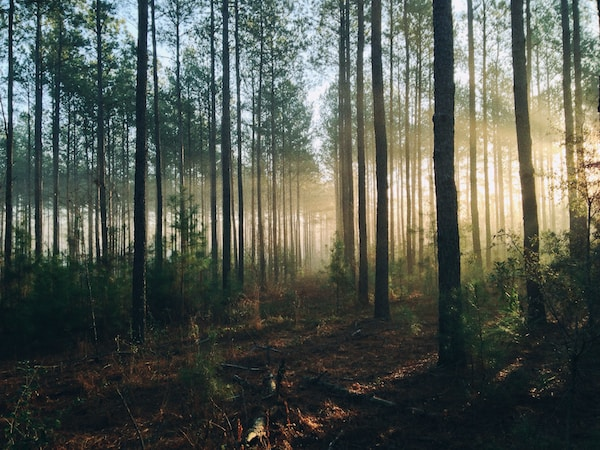

,url,caption,distance
0,https://earthsky.org/upl/2013/07/morning-fores...,morning-forest-scence,20.759821
1,https://itsok2notbeok.files.wordpress.com/2017...,nature-forest-trees-fog,20.760478
2,https://media.istockphoto.com/photos/misty-for...,"misty forest - trees in mist stock pictures, r...",20.762881
3,https://blog.ons.gov.uk/wp-content/uploads/sit...,Picture of a forest,20.774090
4,https://static.wixstatic.com/media/244598303d5...,Hiking Path in Forest,20.774420
5,https://images.unsplash.com/photo-149539522620...,woman walking in the forest,20.777325
6,https://cdn.eyeem.com/thumb/991f5e54cb5563b3c9...,"tree, focus on foreground, branch, growth, tre...",20.780430
7,https://i1.wp.com/artsyforager.com/wp-content/...,Finding Latitude. The Redwoods | artsy forager...,20.782229
8,https://0.s3.envato.com/files/217499708/previe...,Download Morning Forest in Fog nulled download,20.784365
9,https://www.commercialcafe.com/blog/wp-content...,Best US Cities by Public Parks and Walkability,20.784607


In [15]:
import requests
import PIL

# https://unsplash.com/photos/MMJx78V7xS8
image_url = "https://images.unsplash.com/photo-1425913397330-cf8af2ff40a1?w=600"

image = PIL.Image.open(requests.get(image_url, stream=True).raw)
display(image)

image_embedding = model.encode([image])

distances, indices = nn.kneighbors(image_embedding)

results = pd.DataFrame(
    {
        "url": [df["url"][i] for i in indices.flatten()],
        "caption": [df["caption"][i] for i in indices.flatten()],
        "distance": distances.flatten(),
    }
)
results

In [16]:
HTML(
    pd.DataFrame(
        {
            "image": [
                Image(url=url, width=200)._repr_html_() for url in results["url"]
            ],
            "caption": [caption for caption in results["caption"]],
        }
    ).styled().to_html(escape=False)
)

,image,caption
0,,morning-forest-scence
1,,nature-forest-trees-fog
2,,"misty forest - trees in mist stock pictures, royalty-free photos & images"
3,,Picture of a forest
4,,Hiking Path in Forest
5,,woman walking in the forest
6,,"tree, focus on foreground, branch, growth, tree trunk, close-up, nature, leaf, forest, selective focus, tranquility, plant, day, outdoors, twig, no people, sunlight, green color, beauty in nature, stem"
7,,Finding Latitude. The Redwoods | artsy forager #travel #nature #photography #findinglatitude #redwoods
8,,Download Morning Forest in Fog nulled download
9,,Best US Cities by Public Parks and Walkability
